# **0. Load Dataset**

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read dataset
url = 'https://drive.google.com/file/d/14G4xOWK5e-QQ9S7GmBwULChNdeJZXs2U/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id

df = pd.read_csv(dwn_url)

# **1. EDA (Exploratory Data Analysis)**

## **1.1 Statistical Summary**

### **1.1.1 Tipe Data**

In [3]:
# mengecek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

- Feature seharusnya memiliki tipe data *datetime* : `FFP_DATE`, `FIRST_FLIGHT_DATE`, `LOAD_TIME`, `LAST_FLIGHT_DATE`
- Feature `AGE` sebaiknya *integer*

In [4]:
# jumlah record dan feature
print('Total Record :', df.shape[0])
print('Total Features :', df.shape[1])

Total Record : 62988
Total Features : 23


In [5]:
# sampling dataset
df.sample(5)

MEMBER_NO    FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER  WORK_CITY  \
30080      13599  10/19/2010          6/5/2011   Male         4        NaN   
46626       8125    1/1/2013          1/3/2013   Male         4    JAKARTA   
29030      41118   7/19/2011         7/22/2011   Male         4  guangzhou   
21901      58858  11/11/2010        11/11/2010   Male         4    beijing   
45725       3183   3/31/2008         3/31/2008   Male         4        NaN   

      WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
30080           NaN           KR  43.0  3/31/2014  ...    3654.0       10798   
46626             .           ID  59.0  3/31/2014  ...       0.0        4843   
29030     guangdong           CN  44.0  3/31/2014  ...    1756.0       11337   
21901       beijing           CN  37.0  3/31/2014  ...    8289.0       14345   
45725           NaN           TW  58.0  3/31/2014  ...    2212.0        6157   

       LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
30080          1/6/2014           86         126.5          336   
46626          1/3/2013          454           0.0            0   
29030         1/24/2014           68         128.0          327   
21901         3/21/2014           11          72.0          184   
45725          3/8/2014           24         122.4          306   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
30080               0      0.690202        6477                0  
46626               0      0.687952        3344                0  
29030               0      0.690572        6622                0  
21901               0      0.774627       10887                0  
45725               0      0.566817        2180                0  

[5 rows x 23 columns]

### **1.1.2 Missing Value**

In [6]:
# cek data yang hilang
counts = df.isna().sum().sort_values(ascending=False)

# persentase data yang hilang
percents = round(df.isna().mean() * 100, 2).sort_values(ascending=False)

null = pd.concat([counts, percents], axis=1, keys=["null_counts", "%"])
null

null_counts     %
WORK_PROVINCE             3248  5.16
WORK_CITY                 2269  3.60
SUM_YR_1                   551  0.87
AGE                        420  0.67
SUM_YR_2                   138  0.22
WORK_COUNTRY                26  0.04
GENDER                       3  0.00
MEMBER_NO                    0  0.00
LAST_FLIGHT_DATE             0  0.00
Points_Sum                   0  0.00
avg_discount                 0  0.00
EXCHANGE_COUNT               0  0.00
MAX_INTERVAL                 0  0.00
AVG_INTERVAL                 0  0.00
LAST_TO_END                  0  0.00
BP_SUM                       0  0.00
SEG_KM_SUM                   0  0.00
FFP_DATE                     0  0.00
FLIGHT_COUNT                 0  0.00
LOAD_TIME                    0  0.00
FFP_TIER                     0  0.00
FIRST_FLIGHT_DATE            0  0.00
Point_NotFlight              0  0.00

In [7]:
# Persentase record/rows yang mengandung missing value
df_nan = df[df.isna().any(axis=1)]
print(f'Persentase missing value pada dataset : {round(len(df_nan)/len(df)*100, 2)}%')

Persentase missing value pada dataset : 7.51%


- Terdapat 5 feature yang memiliki missing value : `WORK_PROVINCE`, `WORK_CITY`, `SUM_YR_1`, `AGE`, `SUM_YR_2`, `WORK_COUNTRY`
- Dataset memiliki 7.51% missing value (dibawah 10%)

### **1.1.3 Duplikat Data**

In [8]:
# cek duplikat
df.duplicated().any()

False

Tidak ada data yang duplikat

### **1.1.4 Pengelompokan Data Berdasarkan Tipe Data**

In [9]:
# cek feature yang memiliki nilai numerik
nums = df.loc[:, (df.dtypes == int) | (df.dtypes == float)].columns.tolist()
print(nums)
print(f'Jumlah feature numerikal : {len(nums)}')

['AGE', 'SUM_YR_1', 'SUM_YR_2', 'AVG_INTERVAL', 'avg_discount']
Jumlah feature numerikal : 5


In [10]:
# cek data yang memiliki nilai kategorik
cats = df.loc[:, (df.dtypes == object)].columns.tolist()
print(cats)
print(f'Jumlah feature kategorikal : {len(cats)}')

['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE']
Jumlah feature kategorikal : 8


In [11]:
# split data berdasarkan kategori
nums = ['MEMBER_NO', 'AGE', 'FFP_TIER', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT',
       'avg_discount', 'Points_Sum', 'Point_NotFlight']
cats = ['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']

### **1.1.5 Statistika Deskritif**

In [12]:
# analisis deskriptif data numerikal
df[nums].describe().T

count          mean           std    min           25%  \
MEMBER_NO        62988.0  31494.500000  18183.213715    1.0  15747.750000   
AGE              62568.0     42.476346      9.885915    6.0     35.000000   
FFP_TIER         62988.0      4.102162      0.373856    4.0      4.000000   
FLIGHT_COUNT     62988.0     11.839414     14.049471    2.0      3.000000   
BP_SUM           62988.0  10925.081254  16339.486151    0.0   2518.000000   
SUM_YR_1         62437.0   5355.376064   8109.450147    0.0   1003.000000   
SUM_YR_2         62850.0   5604.026014   8703.364247    0.0    780.000000   
SEG_KM_SUM       62988.0  17123.878691  20960.844623  368.0   4747.000000   
LAST_TO_END      62988.0    176.120102    183.822223    1.0     29.000000   
AVG_INTERVAL     62988.0     67.749788     77.517866    0.0     23.370370   
MAX_INTERVAL     62988.0    166.033895    123.397180    0.0     79.000000   
EXCHANGE_COUNT   62988.0      0.319775      1.136004    0.0      0.000000   
avg_discount     62988.0      0.721558      0.185427    0.0      0.611997   
Points_Sum       62988.0  12545.777100  20507.816700    0.0   2775.000000   
Point_NotFlight  62988.0      2.728155      7.364164    0.0      0.000000   

                          50%           75%       max  
MEMBER_NO        31494.500000  47241.250000   62988.0  
AGE                 41.000000     48.000000     110.0  
FFP_TIER             4.000000      4.000000       6.0  
FLIGHT_COUNT         7.000000     15.000000     213.0  
BP_SUM            5700.000000  12831.000000  505308.0  
SUM_YR_1          2800.000000   6574.000000  239560.0  
SUM_YR_2          2773.000000   6845.750000  234188.0  
SEG_KM_SUM        9994.000000  21271.250000  580717.0  
LAST_TO_END        108.000000    268.000000     731.0  
AVG_INTERVAL        44.666667     82.000000     728.0  
MAX_INTERVAL       143.000000    228.000000     728.0  
EXCHANGE_COUNT       0.000000      0.000000      46.0  
avg_discount         0.711856      0.809476       1.5  
Points_Sum        6328.500000  14302.500000  985572.0  
Point_NotFlight      0.000000      1.000000     140.0

**Observasi :**
- Mayoritas feature memiliki nilai mean > median yang menandakan feature cenderung berdistribusi positively skewed.
- `MEMBER_NO`, `FFP_TIER` dan `avg_discount` memiliki nilai mean yang hampir sama dengan median yang menandakan fitur tersebut cenderung mendekati distribusi normal.
- Nilai maksimal pada feature `AGE` adalah 110, usia ini terlalu tua.
- Terdapat nilai 0 yaitu `BP_SUM`, `SUM_YR_1`, `SUM_YR_2`, `AVG_INTERVAL`, `MAX_INTERVAL`, `EXCHANGE_COUNT`, `avg_discount`, `Points_Sum`, `Point_NotFlight`.

In [13]:
# analisis deskriptif data kategorikal
df[cats].describe().T

count unique        top   freq
GENDER             62985      2       Male  48134
WORK_CITY          60719   3234  guangzhou   9386
WORK_PROVINCE      59740   1165  guangdong  17509
WORK_COUNTRY       62962    118         CN  57748
FFP_DATE           62988   3068  1/13/2011    184
FIRST_FLIGHT_DATE  62988   3406  2/16/2013     96
LOAD_TIME          62988      1  3/31/2014  62988
LAST_FLIGHT_DATE   62988    731  3/31/2014    959

In [14]:
# Persentase
print(f'% Male      : {round(48134/62985*100, 2)}')
print(f'% guangzhou : {round(9386/60719*100, 2)}')
print(f'% guangdong : {round(17509/59740*100, 2)}')
print(f'% CN        : {round(57748/62962*100, 2)}')

% Male      : 76.42
% guangzhou : 15.46
% guangdong : 29.31
% CN        : 91.72


**Observasi :**
- Sebagian besar 76.42% user yang menggunakan maskapai adalah Laki-laki
- Mayoritas user yang menggunakan maskapai berasal dari kota guangzhou dengan persentase sebesar 15.46%
- Mayoritas user yang menggunakan maskapai berasal dari provinsi guangdong dengan persentase sebesar 29.31%
- Kode CN merupakan negara mayoritas user berasal dengan persentase sebesar 91.72%


In [15]:
# Jumlah cats
for col in cats:
    print(f'''Value count kolom {col}:''')
    print('-' * 50)
    print(df[col].value_counts())
    print()

Value count kolom GENDER:
--------------------------------------------------
Male      48134
Female    14851
Name: GENDER, dtype: int64

Value count kolom WORK_CITY:
--------------------------------------------------
guangzhou    9386
beijing      7845
shanghai     5001
shenzhen     3605
dalian       1979
             ... 
KASUGAI         1
hainan          1
xinxishi        1
KA              1
lingshui        1
Name: WORK_CITY, Length: 3234, dtype: int64

Value count kolom WORK_PROVINCE:
--------------------------------------------------
guangdong        17509
beijing           8014
shanghai          4998
liaoning          4182
xinjiang          2512
                 ...  
YAMAGUCHI-KEN        1
AICHIKEN             1
SOUTU HOLLAND        1
xinxixian            1
JAWATIMUR            1
Name: WORK_PROVINCE, Length: 1165, dtype: int64

Value count kolom WORK_COUNTRY:
--------------------------------------------------
CN    57748
HK      991
JP      875
KR      790
US      575
      ...  

### **1.1.6 Rangkuman**

**Hasil :**
- Dataset memiliki 23 feature dengan record 62988.
- Dataset memiliki 15 feature numerikal dan 8 feature kategorikal.
- Rekomendasi tipe data feature `FFP_DATE`, `FIRST_FLIGHT_DATE`, `LOAD_TIME`, `LAST_FLIGHT_DATE` sebaiknya menggunakan datetime dan `AGE` menggunakan integer.
- Dataset memiliki missing value dibawah 10%
- Tidak terdapat record yang duplikat.
- Distribusi feature rata-rata positively skewed.
- Terdapat usia maksimal 110 tahun.
- Nilai 0 pada feature `EXCHANGE_COUNT`, `avg_discount`, `Points_Sum`, `Point_NotFlight` kemungkinan mempresentasikan user tidak mendapat atau melakukan action dari feature tersebut.
- Nilai 0 pada feature `SUM_YR_1`, `SUM_YR_2`,  ` AVG_INTERVAL`, `MAX_INTERVAL` kemungkinan user tidak melakukan penerbangan, hal tersebut dapat dianalisis lebih lanjut.
- Mayoritas user adalah Laki-laki berasal dari China, provinsi Guangdong, kota Guangzhou

## **1.2 Univariate Analysis**

### **1.2.1 Feature Numerikal**

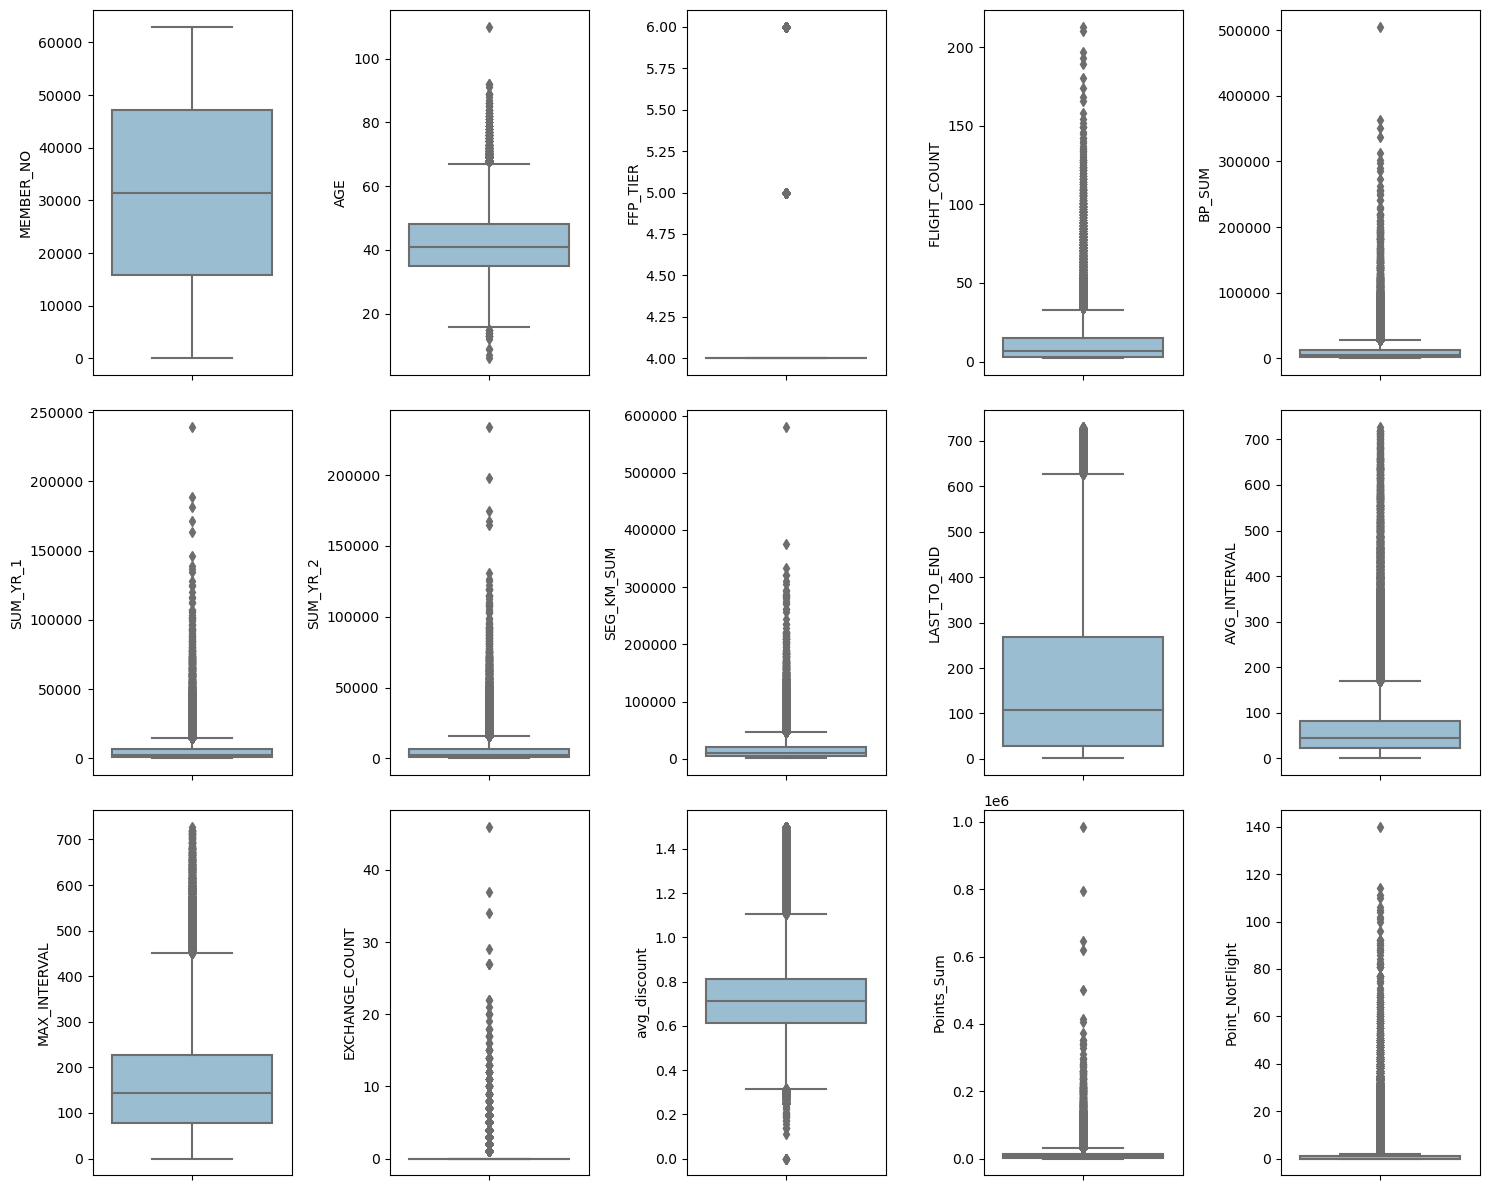

In [16]:
# cek distribusi dan outlier menggunakan boxplot
plt.figure(figsize=(15, 12))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[nums[i]], color='#91bfdb', orient='v')
    plt.tight_layout()

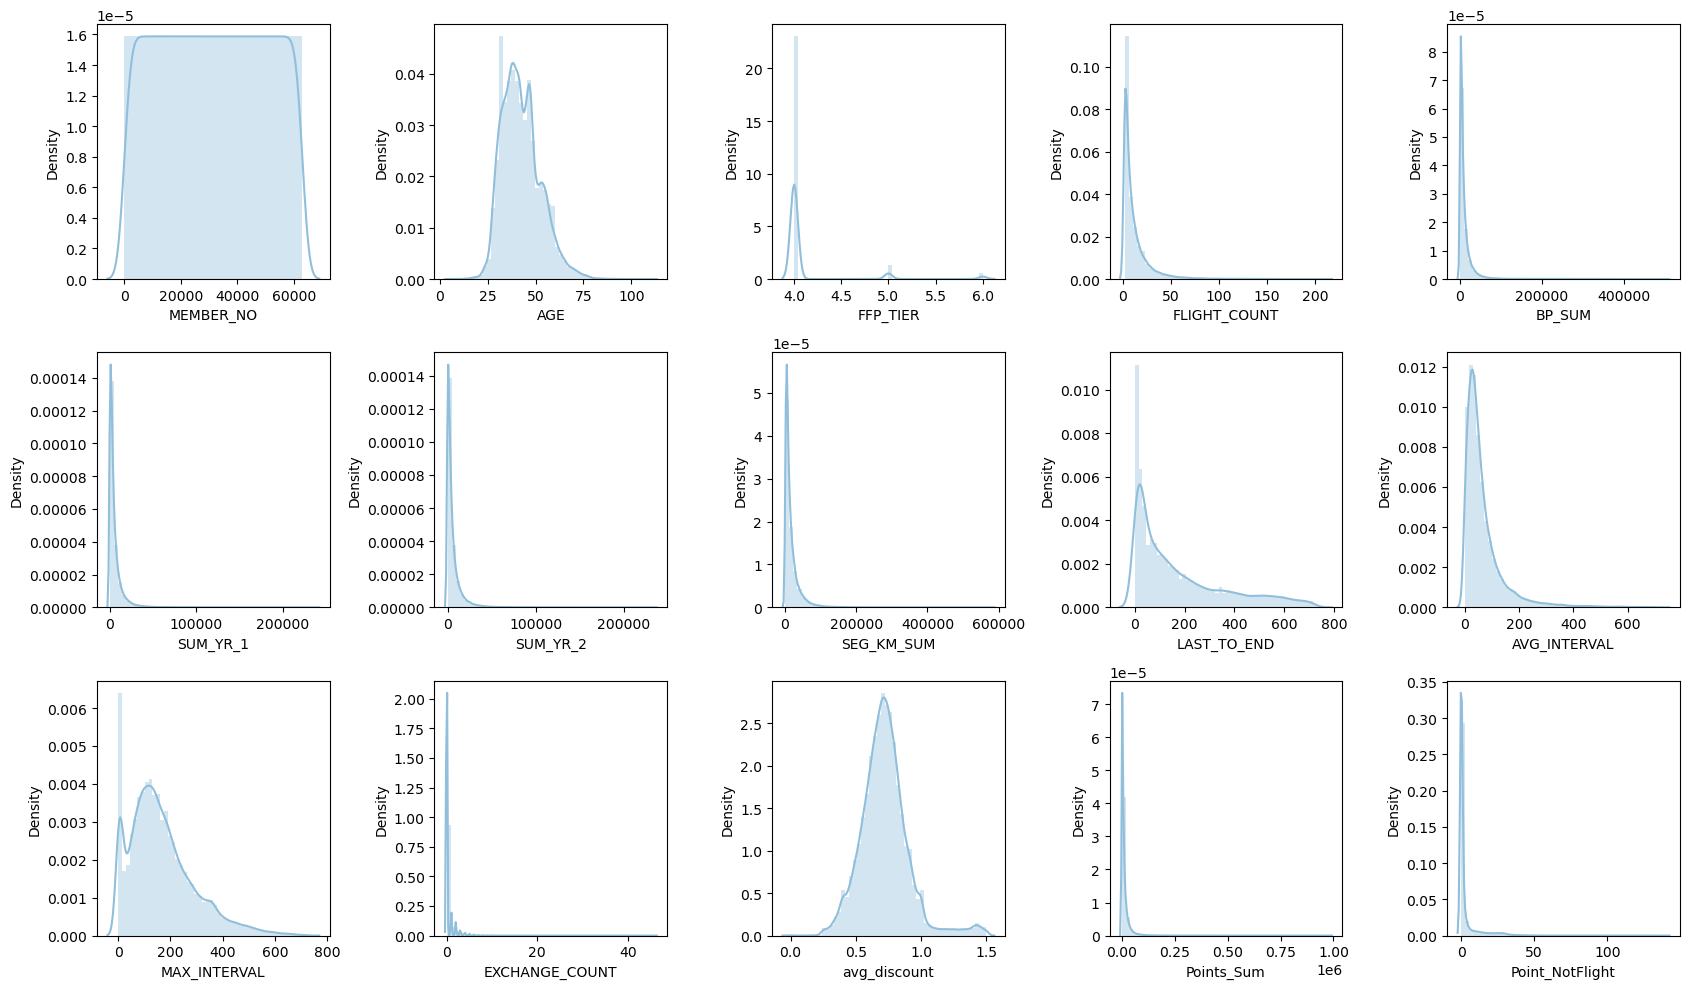

In [17]:
# cek distribusi dan skewness dengan displot
plt.figure(figsize=(17, 10))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.distplot(df[nums[i]], color='#91bfdb')
    plt.tight_layout()

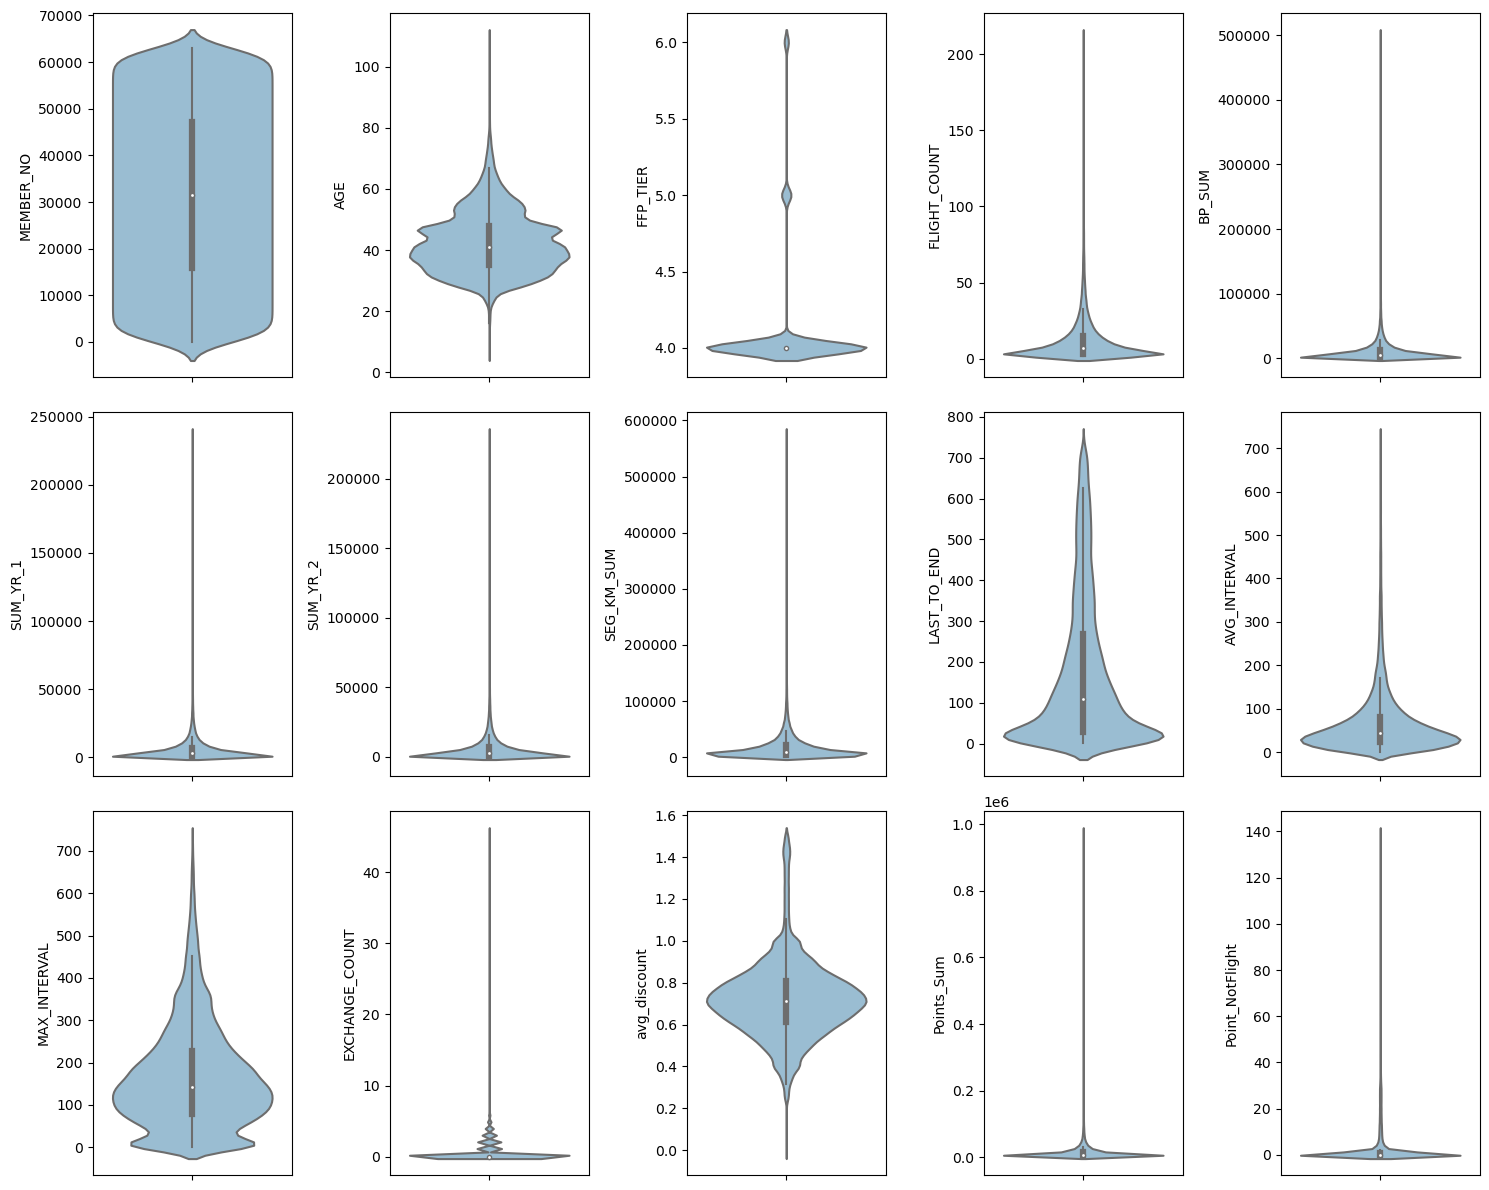

In [18]:
# cek distribusi dengan violinplot
plt.figure(figsize=(15, 12))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.violinplot(y = df[nums[i]], color='#91bfdb', orient='v')
    plt.tight_layout()

### **1.2.2 Feature Kategorikal**

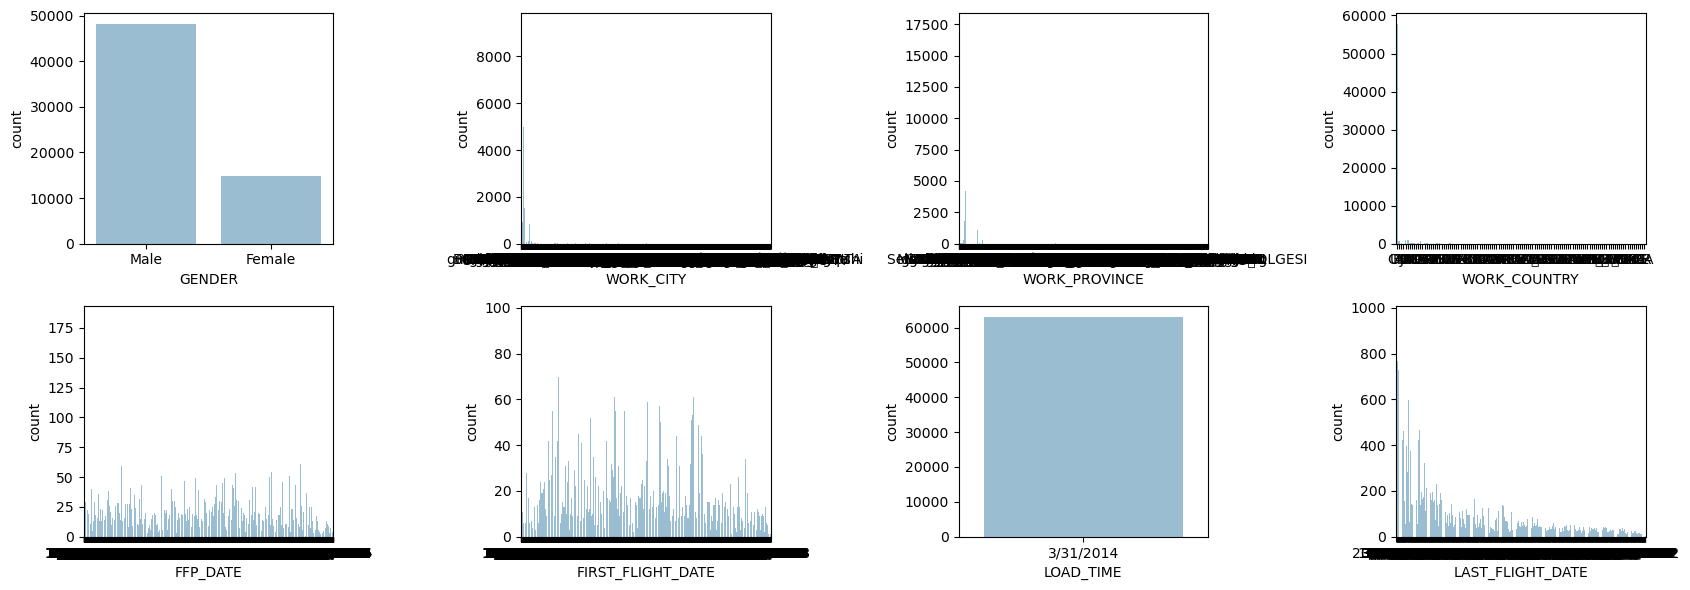

In [19]:
# countplot feature kategorikal
plt.figure(figsize=(17, 6))
for i in range(0, len(cats)):
    plt.subplot(2, 4, i+1)
    sns.countplot(x=df[cats[i]], color='#91bfdb', orient='v')
    plt.tight_layout()

Tidak terlalu banyak insight yang didapatkan, sehingga diputuskan untuk membuat visualisasi top 10 untuk `WORK_CITY`, `WORK_PROVINCE`, `WORK_COUNTRY`


Text(0, 0.5, 'count')

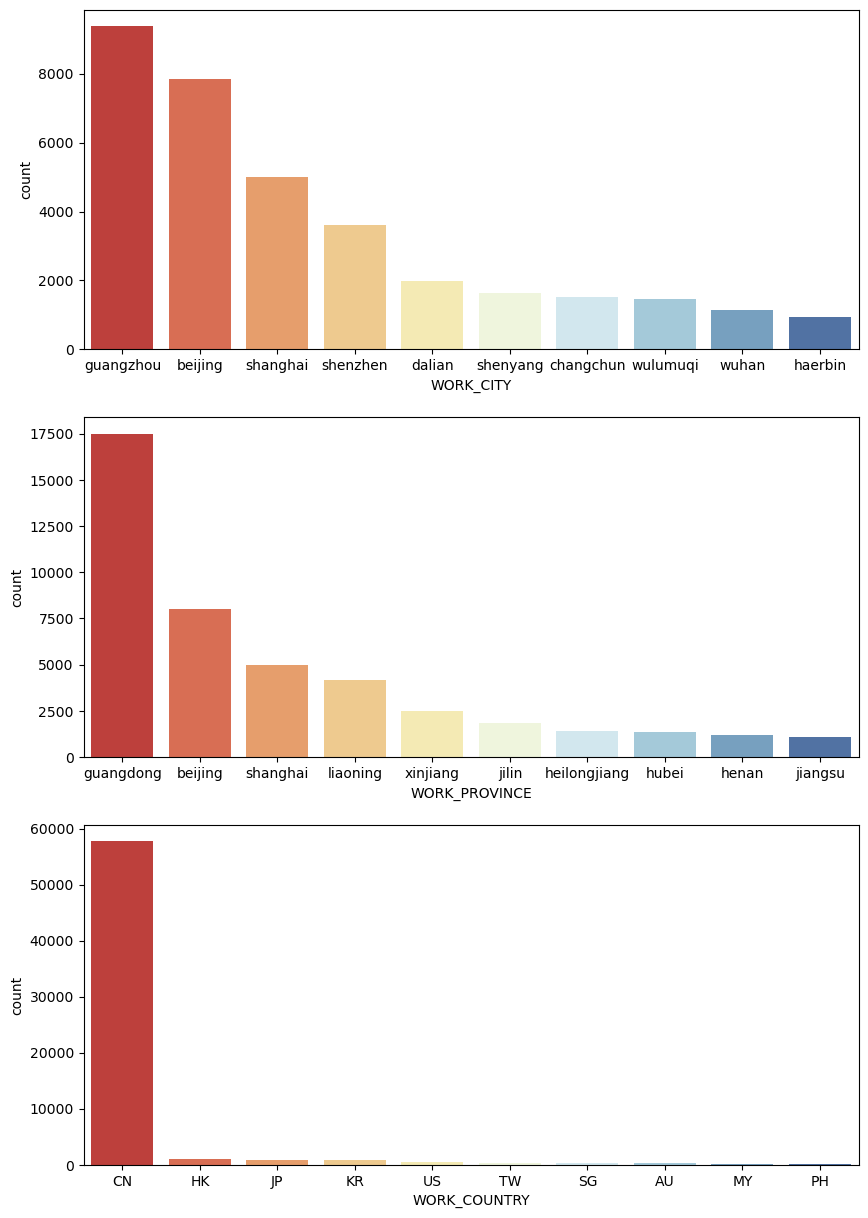

In [20]:
# membuat grafik dengan format 3 rows dengan 1 kolom
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(10,15))

# work_city
# mengambil jumlah kota dengan user 10 terbanyak
work_city_top10 = df['WORK_CITY'].value_counts().head(10)
# membuat visualisasi dalam bentuk bar
sns.barplot(x=work_city_top10.index,y=work_city_top10.values,ax=ax[0], palette=('RdYlBu'))
ax[0].set_xlabel('WORK_CITY')
ax[0].set_ylabel('count')

# work_province
# mengambil jumlah province dengan user 10 terbanyak
work_province_top10 = df['WORK_PROVINCE'].value_counts().head(10)
# membuat visualisasi dalam bentuk bar
sns.barplot(x=work_province_top10.index,y=work_province_top10.values,ax=ax[1], palette=('RdYlBu'))
ax[1].set_xlabel('WORK_PROVINCE')
ax[1].set_ylabel('count')

# work_country
# mengambil jumlah country dengan user 10 terbanyak
work_country_top10 = df['WORK_COUNTRY'].value_counts().head(10)
# membuat visualisasi dalam bentuk bar
sns.barplot(x=work_country_top10.index,y=work_country_top10.values,ax=ax[2], palette=('RdYlBu'))
ax[2].set_xlabel('WORK_COUNTRY')
ax[2].set_ylabel('count')


Visualisasi `FFP_DATE`, `FIRST_FLIGHT_DATE` dan `LAST_FLIGHT_DATE` per tahun

Text(0.5, 0, 'FIRST FLIGHT DATE YEAR')

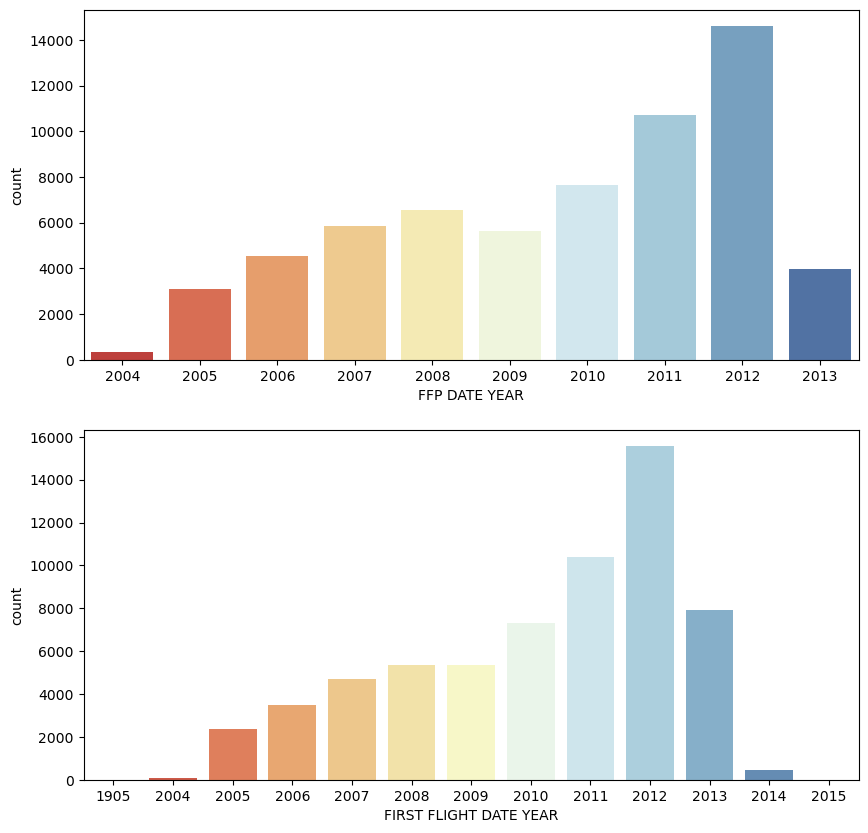

In [21]:
# membuat grafik dengan format 2 rows dengan 1 kolom
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,10))

# FFP
# mengubah tipe object ke datetime
FFP = pd.to_datetime(df['FFP_DATE']).dt.year
# visualisasi
sns.countplot(x=FFP,ax=ax[0], palette=('RdYlBu'))
ax[0].tick_params(axis='x')
ax[0].set_xlabel('FFP DATE YEAR')

# FFD
# mengubah tipe object ke datetime
FFD = pd.to_datetime(df['FIRST_FLIGHT_DATE']).dt.year
# visualisasi
sns.countplot(x=FFD, ax=ax[1], palette=('RdYlBu'))
ax[1].tick_params(axis='x')
ax[1].set_xlabel('FIRST FLIGHT DATE YEAR')


Pada feature `LAST_FLIGHT_DATE` ditemukan nilai tanggal 2014/2/29 yang tidak masuk akal karena 2014 bukanlah tahun kabisat.

In [22]:
# mengcopy dataset untuk analisis sementara
df_last = df.copy()

# drop data yang memilik tanggal 2014/2/29
df_last.drop(df_last[df_last.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index, inplace = True)

Text(0.5, 0, 'LAST FLIGHT DATE YEAR')

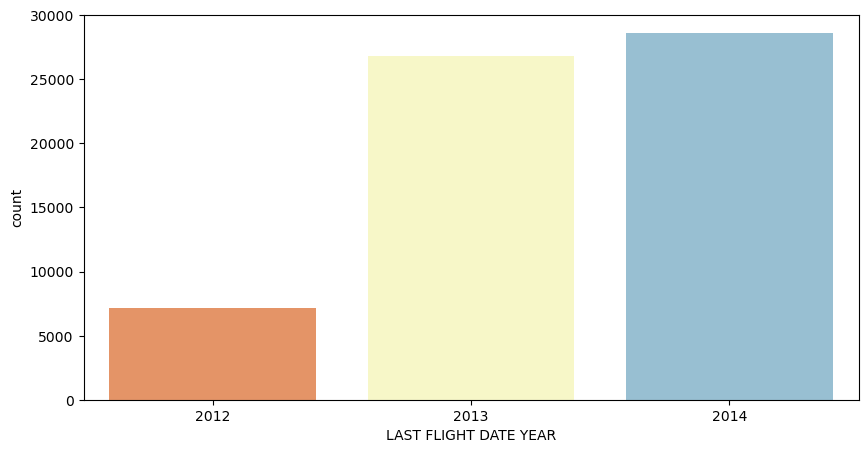

In [23]:
# membuat visualisasi
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
# mengubah tipe object ke datetime
LFD = pd.to_datetime(df_last['LAST_FLIGHT_DATE']).dt.year
# visualisasi
sns.countplot(x=LFD, palette='RdYlBu')
ax.set_xlabel('LAST FLIGHT DATE YEAR')

### **1.2.3 Rangkuman**

**Hasil :**
- Mayoritas feature memiliki outlier, kecuali MEMBER_NO dan FFP_TIER
- Moyaritas feature memiliki distribusi yang positively skew, kecuali pada MEMBER_NO dan avg_discount cenderung mendekati normal.
- Mayoritas user adalah laki-laki
- Mayoritas feature kategorikal memiliki nilai unik
- LOAD_TIME memiliki 1 nilai yaitu 2014-03-31
- Mayoritas user yang bergabung menjadi membership pada tahun 2012
- Terdapat nilai tahun yang sangat jauh pada featur `FIRST FLIGHT DATE` yaitu 1905
- Pada feature `LAST_FLIGHT_DATE` terdapat nilai tanggal yang tidak masuk akal yaitu tanggal 2014/2/29, tahun tersebut bukan tahun kabisat sehingga tidak ada tanggal 29 di bulan Februari.


## **1.3 Multivariate Analysis**

### **1.3.1 Korelasi Antar Feature**

In [24]:
# korelasi antar feature
df.corr()

MEMBER_NO  FFP_TIER       AGE  FLIGHT_COUNT    BP_SUM  \
MEMBER_NO         1.000000 -0.005910  0.001259     -0.000276  0.000063   
FFP_TIER         -0.005910  1.000000  0.078654      0.582447  0.581085   
AGE               0.001259  0.078654  1.000000      0.073246  0.100501   
FLIGHT_COUNT     -0.000276  0.582447  0.073246      1.000000  0.788379   
BP_SUM            0.000063  0.581085  0.100501      0.788379  1.000000   
SUM_YR_1         -0.002529  0.463122  0.111815      0.748032  0.850624   
SUM_YR_2          0.001185  0.611385  0.083743      0.794838  0.884632   
SEG_KM_SUM       -0.000032  0.522350  0.087254      0.850411  0.921724   
LAST_TO_END      -0.002588 -0.206313 -0.025600     -0.404999 -0.319039   
AVG_INTERVAL      0.002479 -0.144928 -0.024613     -0.316833 -0.246764   
MAX_INTERVAL      0.004761 -0.127641  0.009382     -0.188682 -0.147953   
EXCHANGE_COUNT   -0.003844  0.342355  0.029604      0.502501  0.530021   
avg_discount      0.001727  0.248845  0.133235      0.139377  0.307245   
Points_Sum       -0.003613  0.559249  0.074757      0.747092  0.923271   
Point_NotFlight  -0.033204  0.192803 -0.092282      0.291880  0.244254   

                 SUM_YR_1  SUM_YR_2  SEG_KM_SUM  LAST_TO_END  AVG_INTERVAL  \
MEMBER_NO       -0.002529  0.001185   -0.000032    -0.002588      0.002479   
FFP_TIER         0.463122  0.611385    0.522350    -0.206313     -0.144928   
AGE              0.111815  0.083743    0.087254    -0.025600     -0.024613   
FLIGHT_COUNT     0.748032  0.794838    0.850411    -0.404999     -0.316833   
BP_SUM           0.850624  0.884632    0.921724    -0.319039     -0.246764   
SUM_YR_1         1.000000  0.663009    0.804125    -0.186173     -0.243309   
SUM_YR_2         0.663009  1.000000    0.849195    -0.423420     -0.246290   
SEG_KM_SUM       0.804125  0.849195    1.000000    -0.369509     -0.280746   
LAST_TO_END     -0.186173 -0.423420   -0.369509     1.000000     -0.108594   
AVG_INTERVAL    -0.243309 -0.246290   -0.280746    -0.108594      1.000000   
MAX_INTERVAL    -0.145206 -0.154905   -0.155508    -0.343939      0.724392   
EXCHANGE_COUNT   0.488029  0.468149    0.507819    -0.169717     -0.130226   
avg_discount     0.268884  0.234652    0.108393    -0.021036     -0.038814   
Points_Sum       0.788354  0.826666    0.853014    -0.292027     -0.220946   
Point_NotFlight  0.235095  0.237954    0.259037    -0.124074     -0.075967   

                 MAX_INTERVAL  EXCHANGE_COUNT  avg_discount  Points_Sum  \
MEMBER_NO            0.004761       -0.003844      0.001727   -0.003613   
FFP_TIER            -0.127641        0.342355      0.248845    0.559249   
AGE                  0.009382        0.029604      0.133235    0.074757   
FLIGHT_COUNT        -0.188682        0.502501      0.139377    0.747092   
BP_SUM              -0.147953        0.530021      0.307245    0.923271   
SUM_YR_1            -0.145206        0.488029      0.268884    0.788354   
SUM_YR_2            -0.154905        0.468149      0.234652    0.826666   
SEG_KM_SUM          -0.155508        0.507819      0.108393    0.853014   
LAST_TO_END         -0.343939       -0.169717     -0.021036   -0.292027   
AVG_INTERVAL         0.724392       -0.130226     -0.038814   -0.220946   
MAX_INTERVAL         1.000000       -0.089417     -0.016392   -0.135977   
EXCHANGE_COUNT      -0.089417        1.000000      0.112589    0.578581   
avg_discount        -0.016392        0.112589      1.000000    0.263882   
Points_Sum          -0.135977        0.578581      0.263882    1.000000   
Point_NotFlight     -0.042843        0.396115     -0.010315    0.406905   

                 Point_NotFlight  
MEMBER_NO              -0.033204  
FFP_TIER                0.192803  
AGE                    -0.092282  
FLIGHT_COUNT            0.291880  
BP_SUM                  0.244254  
SUM_YR_1                0.235095  
SUM_YR_2                0.237954  
SEG_KM_SUM              0.259037  
LAST_TO_END            -0.124074  
AVG_INTERVAL           -0.075967

<AxesSubplot: >

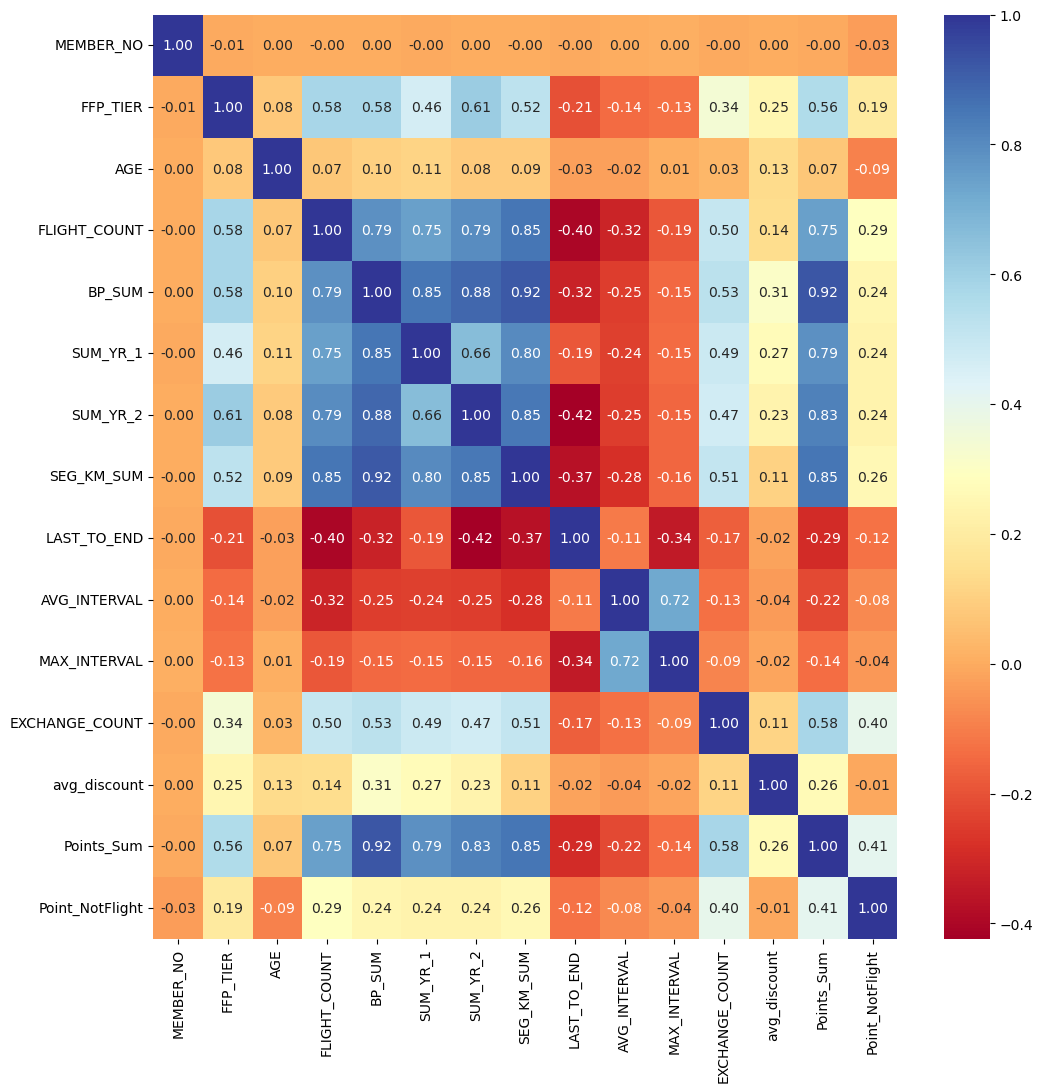

In [25]:
# heatmap korelasi antar feature
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cmap='RdYlBu', annot=True, fmt='.2f')

### **1.3.2 Rangkuman**

Feature yang memiliki korelasi tinggi :
- Antara feature-feature `FLIGHT_COUNT`, `BP_SUM`, `SUM_YR_1`, `SUM_YR_2`, `SEG_KM_SUM`, `Points_Sum`
- `AVG_INTERVAL` dengan `MAX_INTERVAL`
- Feature  `FLIGHT_COUNT`, `BP_SUM`,`SUM_YR_1`, `SUM_YR_2`, `SEG_KM_SUM` sangat berkorelasi satu sama lain. Semakin sering pelanggan membeli atau terbang, semakin jauh jarak penerbangan yang ditempuh dan semakin banyak pendapatan tarif.


# **2. Feature Enginering**

## **2.1 Data Cleaning**

### **2.1.1 Fixing Datatype**

Sebelum memperbaiki tipe dataset, kami memutuskan untuk menghapus feature-feature yang tidak relate dan memiliki banyak nilai unik yaitu `MEMBER_NO`, `WORK_CITY`, `WORK_PROVINCE`, `WORK_COUNTRY`, `AGE`, `GENDER`.

In [3]:
# drop kolom
df_pre = df.drop(columns=['MEMBER_NO', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'GENDER']).copy()

Menghapus tanggal 2014/2/29 yang ditemukan pada `LAST_FLIGHT_DATE`.

In [4]:
# menghapus record
df_pre.drop(df_pre[df_pre.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index, inplace = True)

Mengubah tipe yang memiliki feature tanggal dengan datetime.

In [5]:
# feature yang meiliki type datetime
date_feature = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME','LAST_FLIGHT_DATE']

# inisialisasi
for col in date_feature:
  df_pre[col] = pd.to_datetime(df_pre[col], errors='coerce')

In [6]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62567 entries, 0 to 62987
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           62567 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  62567 non-null  datetime64[ns]
 2   FFP_TIER           62567 non-null  int64         
 3   LOAD_TIME          62567 non-null  datetime64[ns]
 4   FLIGHT_COUNT       62567 non-null  int64         
 5   BP_SUM             62567 non-null  int64         
 6   SUM_YR_1           62016 non-null  float64       
 7   SUM_YR_2           62429 non-null  float64       
 8   SEG_KM_SUM         62567 non-null  int64         
 9   LAST_FLIGHT_DATE   62567 non-null  datetime64[ns]
 10  LAST_TO_END        62567 non-null  int64         
 11  AVG_INTERVAL       62567 non-null  float64       
 12  MAX_INTERVAL       62567 non-null  int64         
 13  EXCHANGE_COUNT     62567 non-null  int64         
 14  avg_di

### **2.1.2 Handling Missing Value**

In [7]:
df_pre.isna().sum()

FFP_DATE               0
FIRST_FLIGHT_DATE      0
FFP_TIER               0
LOAD_TIME              0
FLIGHT_COUNT           0
BP_SUM                 0
SUM_YR_1             551
SUM_YR_2             138
SEG_KM_SUM             0
LAST_FLIGHT_DATE       0
LAST_TO_END            0
AVG_INTERVAL           0
MAX_INTERVAL           0
EXCHANGE_COUNT         0
avg_discount           0
Points_Sum             0
Point_NotFlight        0
dtype: int64

In [8]:
# Persentase record/rows yang mengandung missing value
df_nan = df_pre[df_pre.isna().any(axis=1)]
print(f'Persentase missing value pada dataset : {round(len(df_nan)/len(df_pre)*100, 2)}%')

Persentase missing value pada dataset : 1.1%


- Dikarenakan missing value hanya sebesar 1.1% kami memutuskan untuk menghapusnya karena tidak terlalu signifikan mempengaruhi dalam pemodelan.

In [9]:
# Menghapus baris data dari missing value SUM_YR_1, SUM_YR_2
df_pre = df_pre.dropna()

In [10]:
# cek missing value
df_pre.isna().sum()

FFP_DATE             0
FIRST_FLIGHT_DATE    0
FFP_TIER             0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

**Tambahan** <br>
Sebagai tambahan, kami akan membersihkan data sesuai dengan prosedur standar untuk dataset penerbangan (Tao, 2020) 
- Record di mana harga tiket (SUM_YR_1,SUM_YR_2) berisi nilai 0, dan diskon rata-rata (avg_discount) bukan nol, dan dimana total jarak tempuh (SEG_KM_SUM) lebih dari nol.
- Hal ini diasumsikan bahwa user tidak memiliki riwayat perjalanan

In [11]:
# drop kolom
df_pre.drop(df_pre[(df_pre['SUM_YR_1'] == 0) & (df_pre['SUM_YR_2'] == 0) & (df_pre['avg_discount'] == 0) & (df_pre['SEG_KM_SUM'] > 0)].index, inplace = True)

In [12]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61871 entries, 0 to 62978
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           61871 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  61871 non-null  datetime64[ns]
 2   FFP_TIER           61871 non-null  int64         
 3   LOAD_TIME          61871 non-null  datetime64[ns]
 4   FLIGHT_COUNT       61871 non-null  int64         
 5   BP_SUM             61871 non-null  int64         
 6   SUM_YR_1           61871 non-null  float64       
 7   SUM_YR_2           61871 non-null  float64       
 8   SEG_KM_SUM         61871 non-null  int64         
 9   LAST_FLIGHT_DATE   61871 non-null  datetime64[ns]
 10  LAST_TO_END        61871 non-null  int64         
 11  AVG_INTERVAL       61871 non-null  float64       
 12  MAX_INTERVAL       61871 non-null  int64         
 13  EXCHANGE_COUNT     61871 non-null  int64         
 14  avg_di

## **2.2 Feature Selection**

Kami memutuskan untuk menggunakan LRFMC model. Penjelasan LRFMC menurut Tao (2020) adalah sebagai berikut:
- L (LOYALTY) : Lama waktu user menjadi membership (dalam bulan) dalam diketahui dari selisih dari waktu observasi dengan waktu menjadi menjadi membership.
- R (RECENCY) : Jumlah bulan sejak penerbangan terakhir anggota dari akhir waktu observasi.
- F (FREQUENCY) : Total berapa kali user telah terbang selama periode observasi.
- M (MONETERY) : Miles atau jarak yang terakumulasi selama waktu observasi user.
- C (DC) : Nilai rata-rata discount factor yang digunakan user selama periode observasi.

Maka feature yang diambil :
- FPP_DATE (Frequent Flyer Program Join Date)
- LOAD_TIME (Tanggal Data Diambil)
- FLIGHT_COUNT (Jumlah Penerbangan Customer)
- AVG_DISCOUNT (Rata-rata Discount yang Diadapat Customer)
- SEG_KM_SUM (Total Jarak (km) Penerbangan yang Sudah Dilakukan)
- LAS_TO_END (Jarak Waktu Penerbangan Terakhir ke Pesanan Penerbangan Paling Terakhir)

In [13]:
# select feature
df_feats = df_pre[['LOAD_TIME', 'FFP_DATE', 'LAST_TO_END', 'FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]

In [14]:
# membuat feature untuk loyalti dari feature yang sudah ada
df_feats['TIME_MONTH'] = ((df_pre['LOAD_TIME'] - df_pre['FFP_DATE']).dt.days/30).astype(int)

In [15]:
df_feats = df_feats[['TIME_MONTH', 'LAST_TO_END', 'FLIGHT_COUNT','SEG_KM_SUM','avg_discount']].copy()

In [16]:
df_feats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61871 entries, 0 to 62978
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TIME_MONTH    61871 non-null  int32  
 1   LAST_TO_END   61871 non-null  int64  
 2   FLIGHT_COUNT  61871 non-null  int64  
 3   SEG_KM_SUM    61871 non-null  int64  
 4   avg_discount  61871 non-null  float64
dtypes: float64(1), int32(1), int64(3)
memory usage: 2.6 MB


In [17]:
df_feats.sample(5)

TIME_MONTH  LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM  avg_discount
30754         109          155             9       12868      0.560950
43993          68           46             4        6196      0.614479
36369          20          596             2        5907      0.938226
40218          69          201             7        8913      0.516762
28117          88          127             9        9556      0.855138

## **2.3 Handling Outliers**

In [18]:
lrfmc = ['TIME_MONTH', 'LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']

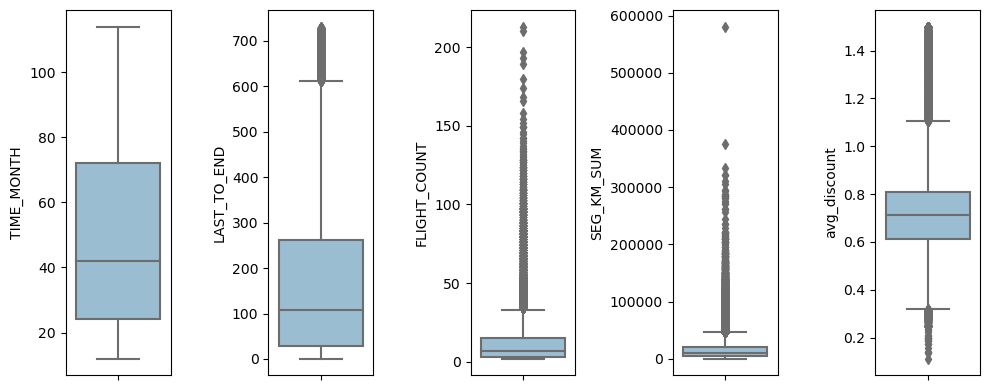

In [19]:
plt.figure(figsize=(10, 4))
for i in range(0, len(lrfmc)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=df_feats[lrfmc[i]], color='#91bfdb', orient='v')
    plt.tight_layout()

In [20]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_feats)}')

fil_ent = np.array([True] * len(df_feats))
for col in lrfmc:
    Q1 = df_feats[col].quantile(0.25)
    Q3 = df_feats[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    fil_ent = ((df_feats[col] >= low_limit) & (df_feats[col] <= high_limit)) & fil_ent
    
df_feats = df_feats[fil_ent].reset_index()

print('Jumlah baris setelah memfilter outlier', len(df_feats))

Jumlah baris sebelum memfilter outlier: 61871
Jumlah baris setelah memfilter outlier 51941


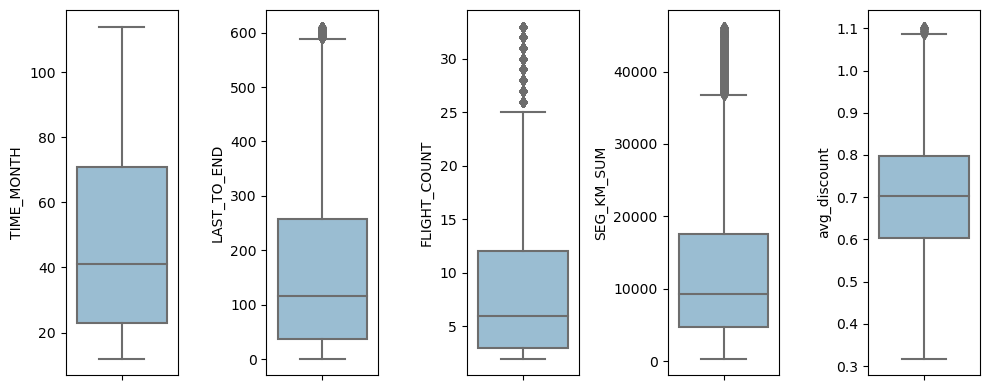

In [21]:
plt.figure(figsize=(10, 4))
for i in range(0, len(lrfmc)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=df_feats[lrfmc[i]], color='#91bfdb', orient='v')
    plt.tight_layout()

In [22]:
df_feats=df_feats.drop(columns='index')

## **2.4 Feature Standardization**

In [23]:
# melihat statistical summary dataset
df_feats.describe()

TIME_MONTH   LAST_TO_END  FLIGHT_COUNT    SEG_KM_SUM  avg_discount
count  51941.000000  51941.000000  51941.000000  51941.000000  51941.000000
mean      47.767544    169.788163      8.799503  12452.171175      0.699237
std       27.861771    161.301486      7.018834   9920.505724      0.144756
min       12.000000      1.000000      2.000000    368.000000      0.317766
25%       23.000000     37.000000      3.000000   4749.000000      0.603592
50%       41.000000    116.000000      6.000000   9288.000000      0.702210
75%       71.000000    258.000000     12.000000  17566.000000      0.796756
max      114.000000    611.000000     33.000000  46205.000000      1.104105

In [24]:
# mengganti nama feature
df_feats.columns =['L', 'R', 'F', 'M', 'C']

In [25]:
# Standardisasi menggunakan StandardScaler
features = ['L', 'R', 'F', 'M', 'C']
X = df_feats[features].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
df_std = pd.DataFrame(data = X_std, columns = features)

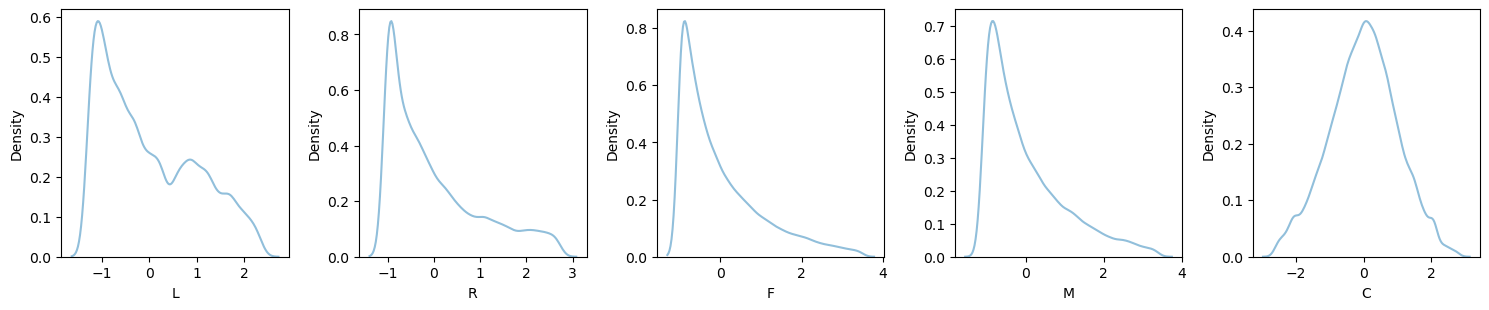

In [26]:
# melihat distribusi data yang telah dilakukan standardisasi
plt.figure(figsize=(15, 15))
for i in range(0, len(features)):
    plt.subplot(5, 5, i+1)
    sns.kdeplot(df_std[features[i]], color='#91bfdb')
    plt.xlabel(features[i])
    plt.tight_layout()

In [27]:
# melihat summary statistic
df_std.describe()

L             R             F             M             C
count  5.194100e+04  5.194100e+04  5.194100e+04  5.194100e+04  5.194100e+04
mean  -9.275656e-16 -3.696198e-15  7.178216e-14  2.718639e-15  9.726881e-16
std    1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00
min   -1.283762e+00 -1.046424e+00 -9.687604e-01 -1.218112e+00 -2.635297e+00
25%   -8.889522e-01 -8.232376e-01 -8.262852e-01 -7.764972e-01 -6.607376e-01
50%   -2.428995e-01 -3.334667e-01 -3.988597e-01 -3.189557e-01  2.053675e-02
75%    8.338551e-01  5.468808e-01  4.559913e-01  5.154856e-01  6.736877e-01
max    2.377203e+00  2.735350e+00  3.447970e+00  3.402362e+00  2.796927e+00

In [28]:
df_std=df_std.copy()

# **3. Modeling**

Untuk menemukan jumlah cluster yang optimal dalam dataset, maka dilakukan analisis n-cluster menggunakan elbow methode dan silhouette score.

## **3.1 Elbow Method & Silhouette Score**

### **3.1.1 Elbow Method: Inertia & Distortion Score**

In [29]:
# mencari nilai k optimal dengan parameter inertia
from sklearn.cluster import KMeans

inertia = []
k_values = range(2,11)

# fit model
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(df_std)
    inertia.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

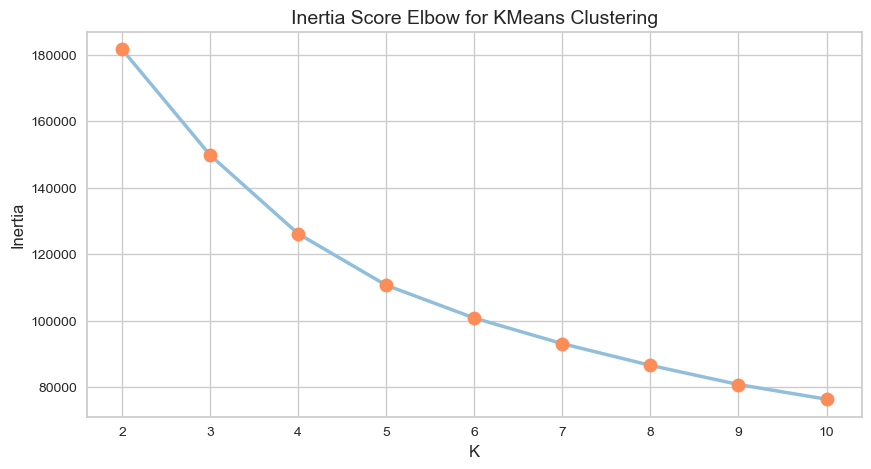

In [40]:
# Visualisasi grafik elbow method
from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize=(10, 5))

# plot grafik
plt.plot(k_values, inertia ,color='#91bfdb', linewidth= 2.5, marker='o', markerfacecolor='#fc8d59', markersize=10)
plt.title('Inertia Score Elbow for KMeans Clustering', fontsize=14)
plt.xlabel('K',fontsize=12)
plt.ylabel('Inertia',fontsize=12)

Berdasarkan grafik yang dihasilkan tidak terlalu terlihat penurunaan nilai dan patahan yang tajam, sehingga nilai k yang optimal tidak terlalu diketahui dengan pasti.

In [30]:
# analisa lebih lanjut dengan persentase dari inertia
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    17.529278
1    15.792936
2    12.282761
3     8.921384
4     7.650363
5     7.009144
6     6.660237
7     5.476228
8          NaN
dtype: float64

Dari selisih nilai yang dihasilkan, nilai k optimal diantara 2-4.

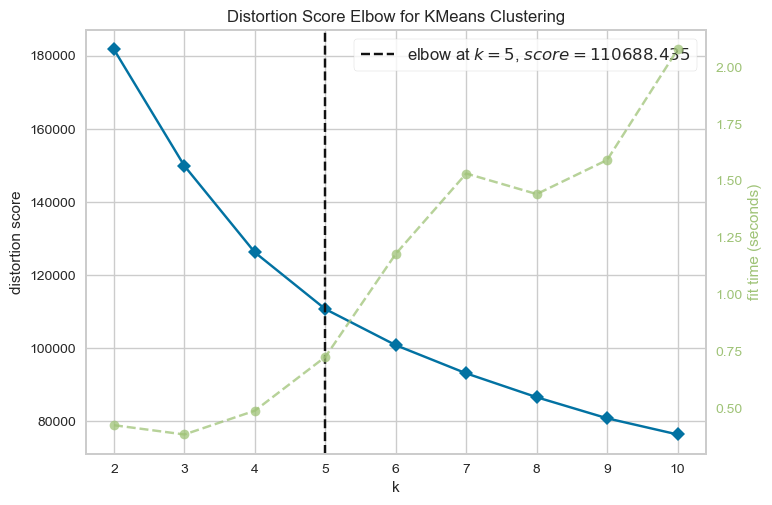

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
# visualisasi innertia vs k dengan parameter distortion
from yellowbrick.cluster import KElbowVisualizer

# fit model
model = KMeans(random_state=123)
visualizer = KElbowVisualizer(model, k=(2,11), metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(df_std)       
visualizer.show() 

Berdasarkan grafik diatas, dengan parameter distortion nilai optimal k = 5.

### **3.1.2 Silhouette Score**

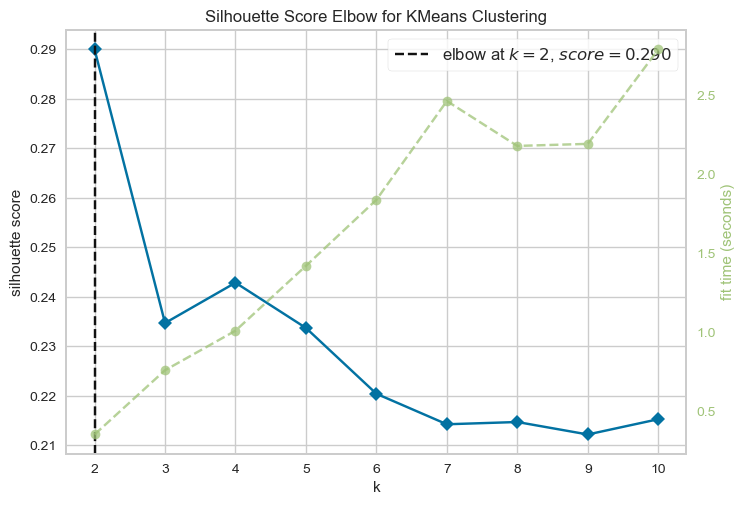

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [57]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=123)
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=True, locate_elbow=True)
visualizer.fit(df_std)        
visualizer.show()    

Berdasarkan hasil diatas dipeoleh banyak cluster optimal yang terbentuk pada k = 2. Sedangkan opsi keduanya pada k = 4. Karena nilai rata-rata silhoutte tersebut merupakan yang tertinggi dari yang lain.

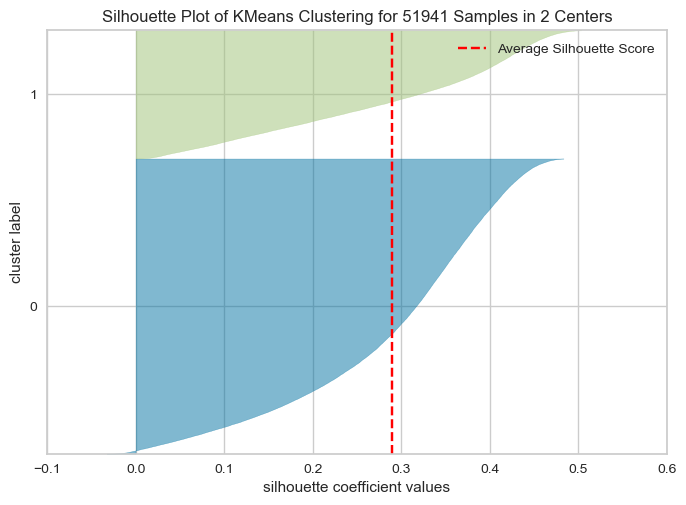

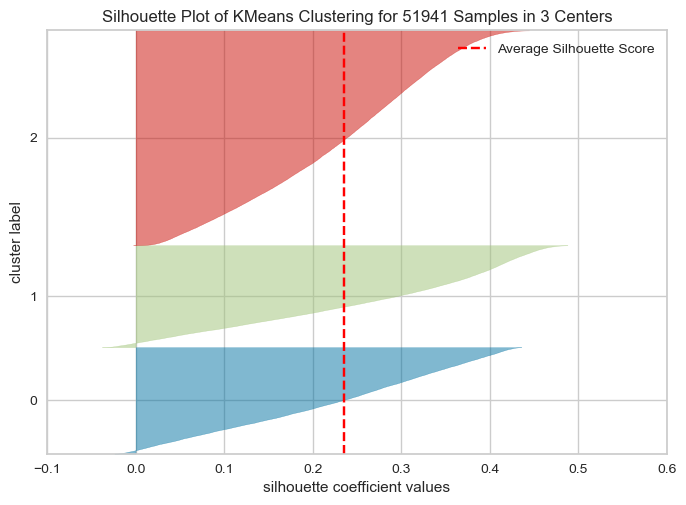

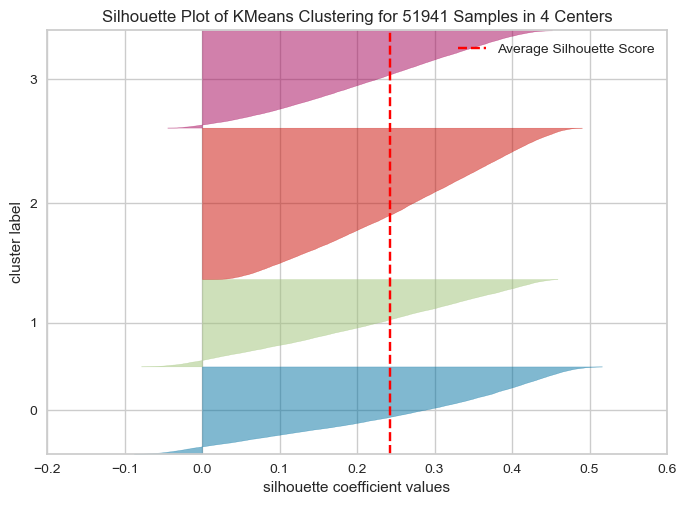

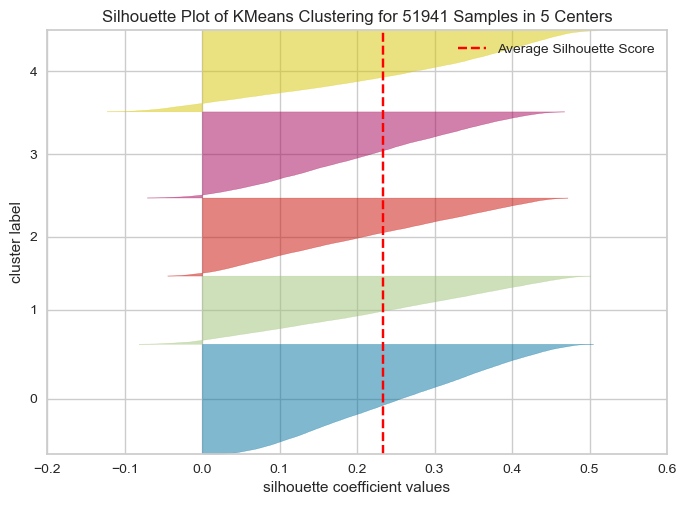

In [59]:
# silhouette plot
from yellowbrick.cluster import SilhouetteVisualizer

for i in [2,3,4,5]:
    model = KMeans(i, random_state=123)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(df_std)        
    visualizer.show()

Berdarkan hasil plot silhouette, untuk menentukan nilai k terbaik harus mempertimbangkan dua faktor yaitu koefisien rata-rata sebesar mungkin, namun tetap lebih kecil dari skor maksimum setiap anggota cluster dan mempertingpangkan ketebalan cluster yang mirip satu sama lain, yang menunjukkan komposisi yang seimbang.

Berdasarkan pertimbangan analisis sebelumnya, maka dipilih k = 5 untuk n-cluster pada analisis K-Means.

## **3.2 K-Means Clustering**

In [41]:
from sklearn.cluster import KMeans

# fit model
kmeans = KMeans(n_clusters=5, random_state = 123)
kmeans.fit(df_std.values)
df_std['cluster'] = kmeans.labels_

In [42]:
df_std.head()

L         R         F         M         C  cluster
0  1.192773 -0.953430  2.735594  3.397020  2.758218        2
1  1.515800 -0.953430  2.878069  3.158925  2.765579        2
2  0.869747 -0.383064 -0.113909  3.341780  2.372683        2
3 -0.135224 -1.009226  2.878069  3.183420  2.487433        2
4  1.085098  1.650415 -0.398860  3.327265  2.213935        2

## **3.3 Evaluasi Menggunakan PCA dan Visualisasi**

In [43]:
## melakukan PCA untuk melihat visualisasi
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(df_std)
pcs = pca.transform(df_std)


df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['cluster'] = df_std['cluster']
df_pca

PC 1      PC 2  cluster
0     -0.488518  4.842422        2
1     -0.389598  4.888242        2
2      0.135681  2.763304        2
3     -0.887372  4.363928        2
4      1.023272  2.006251        2
...         ...       ...      ...
51936  2.956210 -0.889656        0
51937  2.564986 -1.355369        0
51938 -1.571510 -3.041252        4
51939  1.643382 -0.146168        1
51940  1.279305 -0.728231        1

[51941 rows x 3 columns]

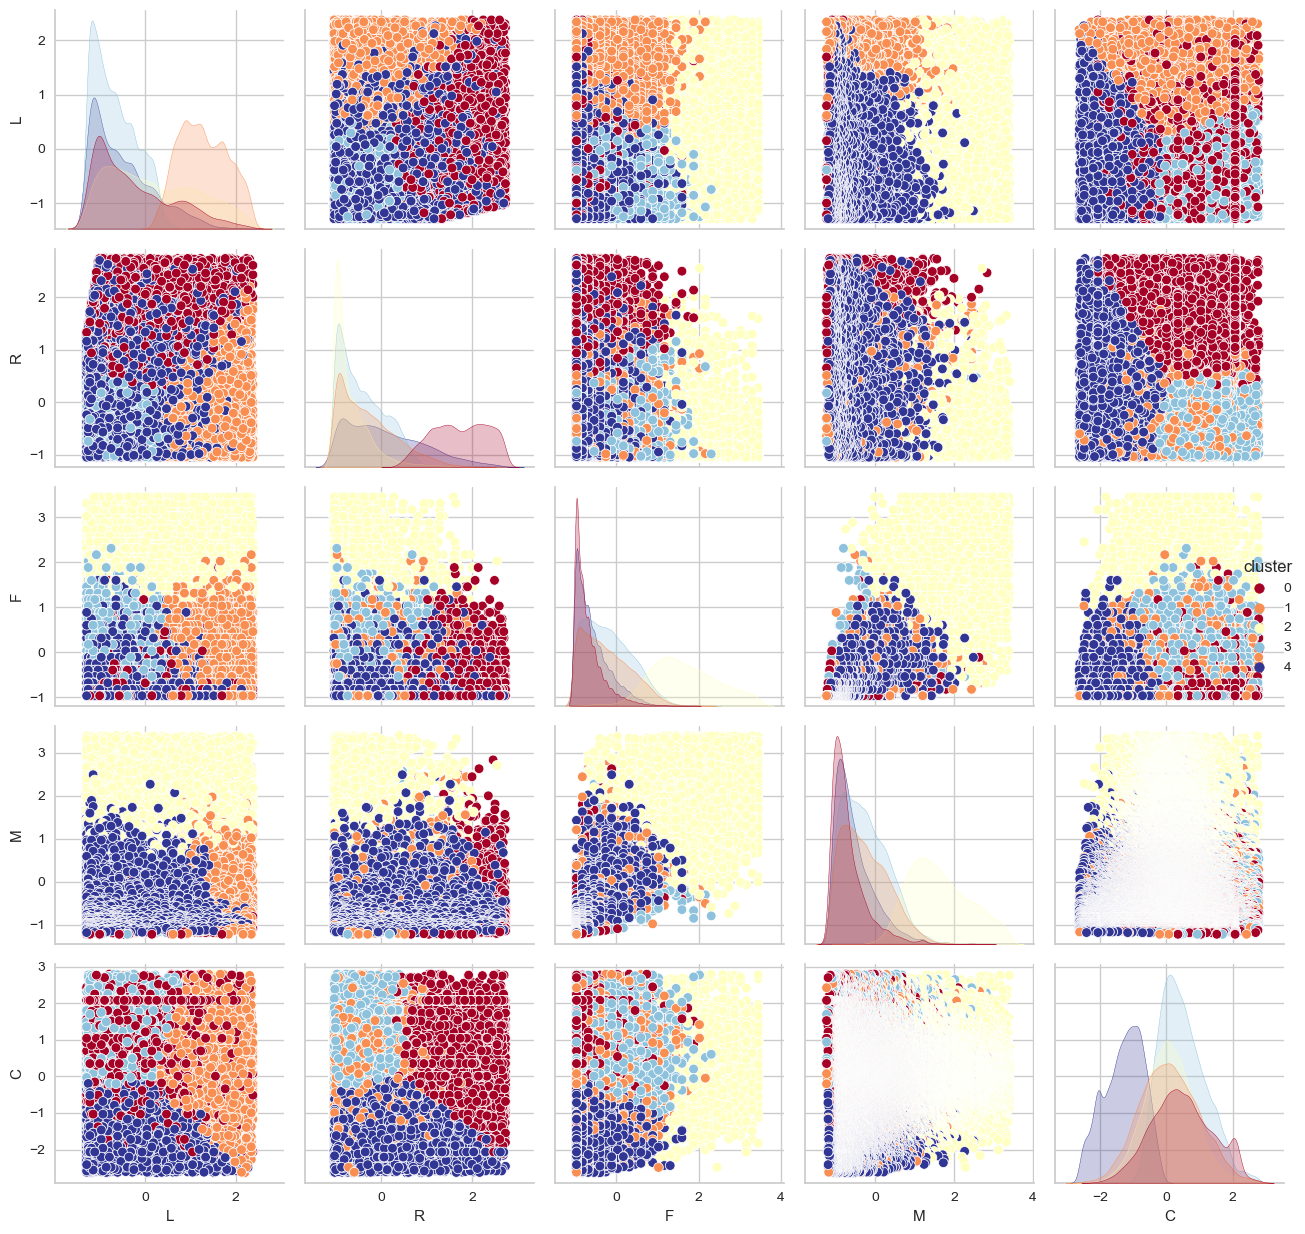

In [44]:
# visualisasi dengan pairplot
sns.pairplot(data=df_std, hue='cluster', diag_kind='kde', palette='RdYlBu')
plt.tight_layout()

Text(0.5, 1.0, 'Customer Segmentation Based on LRFMC Model')

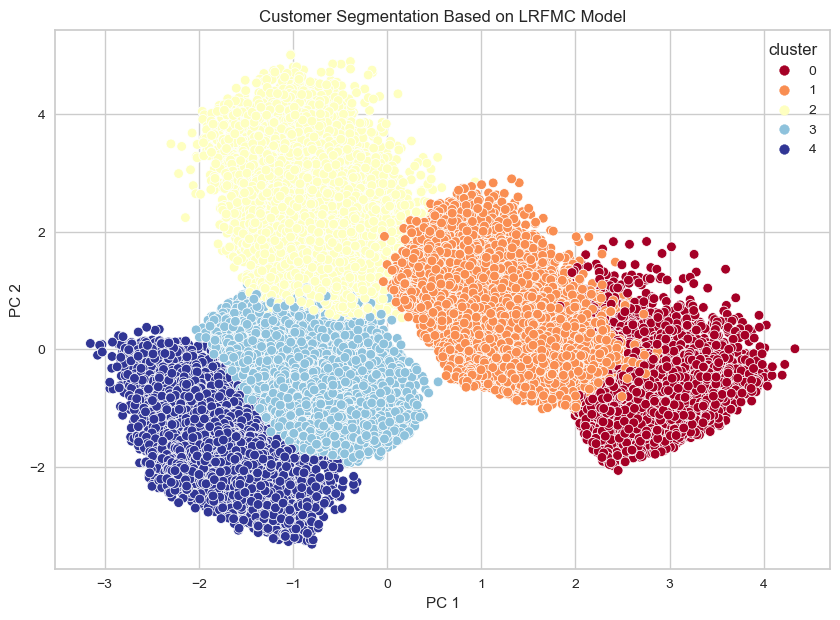

In [45]:
# visualisasi hasi segmentasi
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(data=df_pca, x="PC 1", y="PC 2", hue="cluster", palette='RdYlBu')
plt.title('Customer Segmentation Based on LRFMC Model')

# **4. Interpretasi Model dan Rekomendasi**

## **4.1 Add Cluster to DataFrame**

In [46]:
# menambahkan cluster ke dataframe
df_feats['cluster'] = kmeans.labels_
display(df_feats.groupby('cluster').agg(['mean','median','min','max']))

L                           R                           F  \
              mean median min  max        mean median  min  max       mean   
cluster                                                                      
0        41.292802   35.0  12  114  447.261000  448.0  217  611   3.964491   
1        83.498770   82.0  53  114  122.525260  102.0    1  530   7.115232   
2        53.311457   49.0  12  114   61.593266   34.0    1  581  20.341809   
3        29.458618   27.0  12   70  102.749036   85.0    1  384   7.460101   
4        33.998746   30.0  12  111  186.426721  162.0    1  611   4.773321   

                                   M                               C  \
        median min max          mean   median   min    max      mean   
cluster                                                                
0          3.0   2  22   5869.425514   4535.0   368  40582  0.767027   
1          6.0   2  24  10072.134248   9211.5   368  39469  0.712564   
2         20.0   3  33  28533.418392  27525.5  5152  46205  0.712970   
3          7.0   2  25  10138.972115   9368.0   368  40376  0.769672   
4          4.0   2  20   7375.167241   5992.0   716  37162  0.511810   

                                       
           median       min       max  
cluster                                
0        0.758261  0.392958  1.104000  
1        0.708524  0.317766  1.103630  
2        0.708745  0.339656  1.102905  
3        0.755906  0.535239  1.104105  
4        0.521259  0.317898  0.690485

## **4.2 Percentage of Customer**

In [47]:
# persentase customer setiap cluster
cluster_count = df_feats['cluster'].value_counts().reset_index()
cluster_count.columns = ['cluster', 'count']
cluster_count['percentage (%)'] = round((cluster_count['count']/len(df_std))*100,2)
cluster_count = cluster_count.sort_values(by=['cluster']).reset_index(drop=True)
cluster_count

cluster  count  percentage (%)
0        0   8364           16.10
1        1  10570           20.35
2        2   9950           19.16
3        3  13484           25.96
4        4   9573           18.43

Text(0, 0.5, 'Percentage')

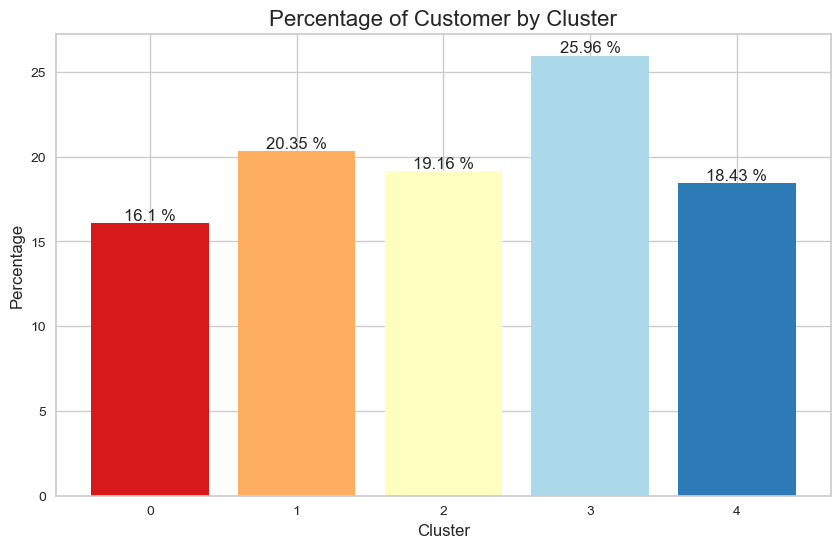

In [48]:
#visualisasi persentase customer pada setiap cluster
fig, ax = plt.subplots(figsize=(10,6))

c = ["#d7191c","#fdae61","#ffffbf","#abd9e9","#2c7bb6"]
bars = plt.bar(x=cluster_count['cluster'], height= cluster_count['percentage (%)'],color=c)

for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height} %', ha='center',
  va='bottom')
plt.title('Percentage of Customer by Cluster', fontsize=16)
plt.xlabel('Cluster',fontsize=12)
plt.ylabel('Percentage',fontsize=12)

## **4.3 Segmentation Analysis**

Text(0, 0.5, 'Value')

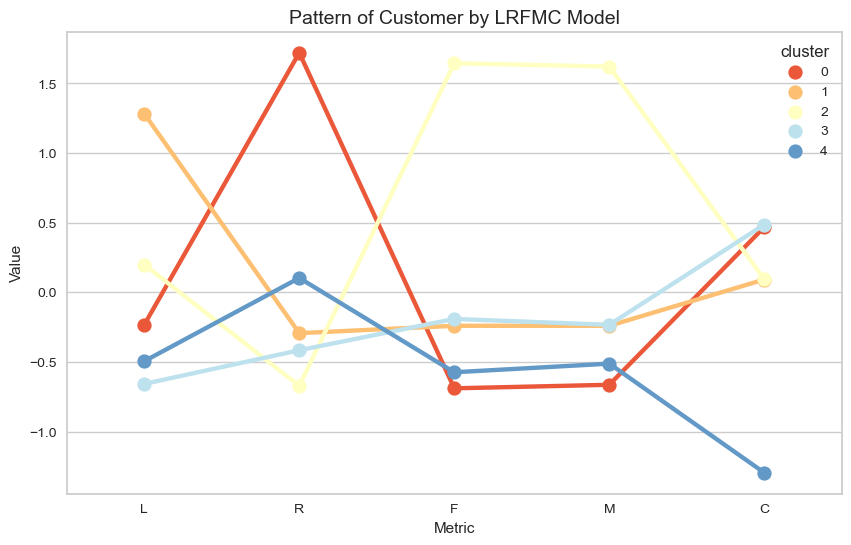

In [49]:
# melihat pola LRFMC pada setiap cluster
cluster_med=df_std.groupby('cluster').mean().reset_index()

df_melt = pd.melt(cluster_med.reset_index(), id_vars='cluster', value_vars=['L', 'R', 'F','M','C'], var_name='Metric', value_name='Value')
plt.figure(figsize=(10,6))
sns.pointplot(data=df_melt, x='Metric', y='Value', hue='cluster', palette='RdYlBu')
plt.title('Pattern of Customer by LRFMC Model', fontsize=14)
plt.xlabel('Metric')
plt.ylabel('Value')

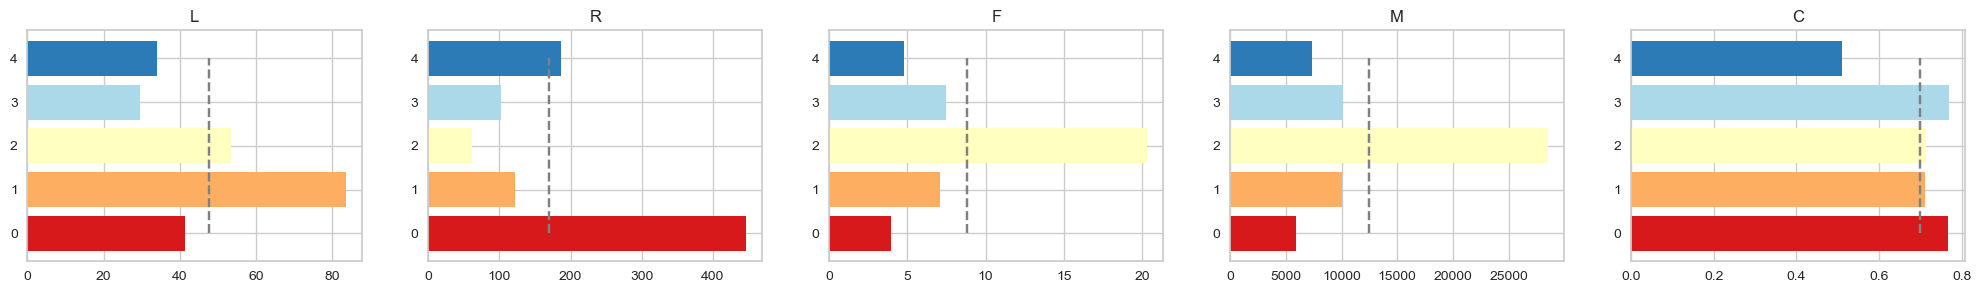

In [50]:
# melihat rata-rata variabel LRFMC antar cluster
LRFMC= ['L','R','F','M','C']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,3])
    i = 1
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        ax.vlines(df_feats[col].mean(), ymin=0, ymax=4, color='grey', linestyle='--')
        g = df_feats.groupby('cluster')
        x = g[col].mean().index
        y = g[col].mean().values
        ax.barh(x,y, color=c) 
        plt.title(col)
        i = i+1
        
dist_list(LRFMC)

Secara keseluruhan cluster-cluster ini terbentuk karena adanya penbedaan indikaror model LRFMC. Berdasarkan hasil analisis dan visualisai dapat diketahui karakteristik customer pada setiap kelompok sebagai berikut:

<p style="text-align: center;">
Tabel 1 - Akumulasi Hasil Nilai LRFMC pada Setiap Cluster
</p> 

|  Cluster  | High Value | Average Value | Low Value |
| :-------- | :--------: | :-----------: | :-------: |
| **Cluster 0** | R | L C | F M |
| **Cluster 1** | L | R F M C  | |
| **Cluster 2** | F M | L C  | R |
| **Cluster 3** |  | F M C  | L R |
| **Cluster 4** |  | R | L F M C |

**Interpretasi :** <<br>
1. Cluster 0 - **Hibernating**
    - Kelompok customer yang telah menjadi member dalam jangka waktu menengah namun tidak sering menggunakan maskapai, nilai frequency dan monetery yang rendah serta recency yang tinggi. Kelompok ini juga memiliki tingkat diskon yang didapatkan berada pada rata-rata.

2. Cluster 1 - **Potential Loyalist**
    - Kelompok customer yang telah menjadi member dalam jangka waktu paling lama dan memiliki aktivitas penerbangan dengan nilai rata-rata, artinya kelompok ini tidak sering melakukan penerbangan dan tingkat recency masih menengah, tapi kelompok ini masih dapat berpotensi untuk menggunakan maskapai dalam waktu yang akan datang.

3. Cluster 2 - ***
    - Kelompok customer yang memliki aktivitas penerbangan yang tinggi dan jarak waktu untuk melakukan tidak jauh. Selain itu kelompok ini telah memjadi member sudah cukup lama.

4. Cluster 3 - ***

5. Cluster 4 - ***